In [8]:
import requests
import urllib
from bs4 import BeautifulSoup 
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

'''def
APE = Un professionnel de santé APE est un professionnel de santé de moins de 65 ans qui a exercé une activité libérale
normale sur une année complète, dans un cadre conventionnel.

'''
%matplotlib inline

In [11]:
#variable fixes for 2015 csv
#fichier des spécialités par régions
#http://www.data.drees.sante.gouv.fr/TableViewer/tableView.aspx
NomFichier = 'hack/rpps-medecins-tab10_28468983352261.csv' 


#fichier des spécialités par département
#http://www.data.drees.sante.gouv.fr/TableViewer/tableView.aspx
NomFichier3 = 'hack/rpps-medecins-tab7_30397381964559.csv' 

'''
import csv
File = open(NomFichier,'r')
Reader = csv.reader(File)
Data = list(Reader) 

import xlrd
workbook = xlrd.open_workbook('my_file_name.xls')
worksheet = workbook.sheet_by_index(0)
'''

depassement='Honoraires_des_professionnels_de_sante_APE_par_region_en_2014.xls'
import xlrd
book = xlrd.open_workbook(depassement)
print("The number of worksheets is {0}".format(book.nsheets))
print("Worksheet name(s): {0}".format(book.sheet_names()))

#spécialiste
sh = book.sheet_by_index(2)
print("{0} {1} {2}".format(sh.name, sh.nrows, sh.ncols))
 
#for rx in range(sh.nrows):
#     print(sh.row(rx))
#    L.append(sh.row(rx))  

The number of worksheets is 8
Worksheet name(s): ['Lisez moi', 'Nomenclature des PS', 'Spécialistes', 'Généralistes et MEP', 'Dentistes et ODF', 'Sages-femmes', 'Auxiliaires médicaux', 'Laboratoires']
Spécialistes 1538 11


# depassement d'honoraires

Dans quelles régions y a-t-il le plus de dépassements?

In [661]:
from xlrd import open_workbook

book = open_workbook(depassement)
sheet = book.sheet_by_index(2)

# read header values into the list    
keys = [sheet.cell(0, col_index).value for col_index in range(sheet.ncols)]
 
dict_list = []
for row_index in range(1, sheet.nrows):
    d = {keys[col_index]: sheet.cell(row_index, col_index).value 
         for col_index in range(sheet.ncols)}
    dict_list.append(d)

dict_list[1508] #exemple de ligne

{'DEPASSEMENTS (Euros)': 941463049.0,
 'DEPASSEMENTS /APE (Euros)': 54691.70727314976,
 'FRAIS DE DEPLACEMENTS (Euros)': 1221394.0,
 'FRAIS DE DEPLACEMENTS /APE (Euros)': 70.95352619960498,
 'HONORAIRES /APE (Euros)': 222727.63181131636,
 'HONORAIRES SANS DEPASSEMENT (Euros)': 2891349011.0,
 'HONORAIRES SANS DEPASSEMENT /APE (Euros)': 167964.971011967,
 "NOMBRE D'APE": 17214.0,
 'REGION INSEE': '11- Ile-de-France',
 'Spécialistes': 'TOTAL MEDECINS',
 'TOTAL DES HONORAIRES (Euros)': 3834033454.0}

In [707]:
#view of dataframe

df =pd.DataFrame(dict_list)
df =df.replace('nc',np.NaN) 
df['taux de dépassement par ape']=(1-df['HONORAIRES SANS DEPASSEMENT (Euros)']/df['TOTAL DES HONORAIRES (Euros)'])*100
df['Spécialistes'].str.contains('TOTAL') #matrice de booleans sans les totales dans spécialist

df_total_spe=df[df['Spécialistes'].str.contains('TOTAL SPECIALISTES')]
df_total_spe_sorted=df_total_spe.sort_values(by='taux de dépassement par ape',ascending=False)
df_total_spe_sorted[:3]

,DEPASSEMENTS (Euros),DEPASSEMENTS /APE (Euros),FRAIS DE DEPLACEMENTS (Euros),FRAIS DE DEPLACEMENTS /APE (Euros),HONORAIRES /APE (Euros),HONORAIRES SANS DEPASSEMENT (Euros),HONORAIRES SANS DEPASSEMENT /APE (Euros),NOMBRE D'APE,REGION INSEE,Spécialistes,TOTAL DES HONORAIRES (Euros),taux de dépassement par ape
1479,843527701.0,88923.434641,35003.0,3.689964,280379.923361,1.816121e+09,191452.798756,9486.0,11- Ile-de-France,TOTAL SPECIALISTES,2.659684e+09,31.716652
1496,304392522.0,71069.932757,32362.0,7.555919,294274.787532,9.559540e+08,223197.298856,4283.0,82- Rhône-Alpes,TOTAL SPECIALISTES,1.260379e+09,24.153442
1488,80856500.0,66275.819672,10217.0,8.374590,314584.942623,3.029269e+08,248300.748361,1220.0,42- Alsace,TOTAL SPECIALISTES,3.837936e+08,21.070365


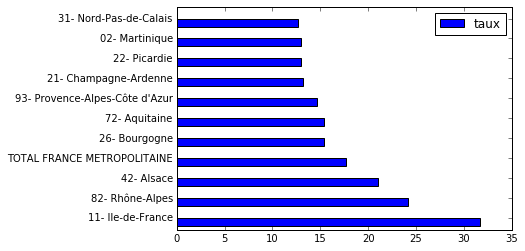

In [702]:
#########################################################################################################
#                             plot 10 régions avec le plus de dépassement
#########################################################################################################
df_tmp= df_total_spe_sorted[:11]
# x = range(len(df))
# y = df['taux de dépassement par ape'].as_matrix()
my_yticks = df_tmp['REGION INSEE'].as_matrix() 
# plt.yticks(x, my_xticks)
# plt.plot( y,x)
# plt.show() 

  
ind = np.arange(len(df_tmp))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, df_tmp['taux de dépassement par ape'].as_matrix(), width, color='b',label='taux' ) 

ax.set(yticks=ind + width, yticklabels=my_yticks, ylim=[2*width - 1, len(df_tmp)])
ax.legend()

plt.show()

In [704]:
#df_total_medecin[['REGION INSEE','DEPASSEMENTS (Euros)','Spécialistes'] ]
df_top_10=df_total_spe.sort_values('taux de dépassement par ape', ascending=False).nlargest(11, 'taux de dépassement par ape')
##
df_top_10[['REGION INSEE','taux de dépassement par ape']]

,REGION INSEE,taux de dépassement par ape
1479,11- Ile-de-France,31.716652
1496,82- Rhône-Alpes,24.153442
1488,42- Alsace,21.070365
1501,TOTAL FRANCE METROPOLITAINE,17.634628
1485,26- Bourgogne,15.414791
1493,72- Aquitaine,15.400737
1499,93- Provence-Alpes-Côte d'Azur,14.607000
1480,21- Champagne-Ardenne,13.196481
1481,22- Picardie,12.981608
1503,02- Martinique,12.968002


Quelles spécialités font le plus de dépassement?

In [705]:
#########################################################################################################
#                             depassement par spécialité  vu globale
#########################################################################################################
#omnipraticient + spe 
#df_depassement=df_total_medecin[['DEPASSEMENTS (Euros)','REGION INSEE','Spécialistes'] ]

# #juste spe
df['Spécialistes'].str.contains('TOTAL') #matrice de booleans sans les "TOTAL" dans spécialistes

df_spe =df[df['Spécialistes'].str.contains('TOTAL')]
group=df_spe[['Spécialistes','taux de dépassement par ape']].groupby('Spécialistes')

by_spe=[]
print(type(group))
#group.mean().sort_values('taux de dépassement par ape', ascending=False) 
group_mean_total_spe_depassement = group.mean().sort_values('taux de dépassement par ape', ascending=False) 
group_mean_total_spe_depassement

<class 'pandas.core.groupby.DataFrameGroupBy'>


,taux de dépassement par ape
Spécialistes,
"TOTAL STOMATOLOGIE (45, 18)",41.270925
"TOTAL CHIRURGIE y compris 10,16,41 (43, 44, 46, 47, 48, 49, 04, 10, 16, 41)",27.579939
"TOTAL GYNECOLOGIE (70, 77, 79, 07)",20.492120
"TOTAL ANESTHESIE REANIMATION (02, 20)",13.131925
TOTAL SPECIALISTES,12.299390
"TOTAL MEDECINE INTERNE (71, 73, 09)",10.330296
"TOTAL PSYCHIATRIE et NEUROPSYCHIATRIE (75, 33, 17)",8.357680
TOTAL MEDECINS,7.827148
"TOTAL PEDIATRIE (78, 12)",7.717528


In [708]:
#########################################################################################################
#                             depassement par spécialité  vu detaillée top10
#########################################################################################################
 
~df['Spécialistes'].str.contains('TOTAL') #matrice de booleans sans les totales dans spécialist

df_not_total_spe =df[~df['Spécialistes'].str.contains('TOTAL')]

grouped = df_not_total_spe[['Spécialistes','taux de dépassement par ape']].groupby('Spécialistes')
grouped_depassement_mean = grouped.mean().sort_values('taux de dépassement par ape', ascending=False)
grouped_depassement_mean[:10]
#(grouped_depassement_mean.index.values)
# df_not_total_spe['Spécialistes'].unique().shape 

,taux de dépassement par ape
Spécialistes,
46- Chirurgie plastique reconstructrice et esthétique,52.514583
10- Neurochirurgie,44.274902
18- Stomatologie,42.678993
43- Chirurgie infantile,42.142320
45- Chirurgie maxillo-faciale et stomatologie,40.174938
44- Chirurgie maxillo-faciale,38.467214
41- Chirurgie orthopédique et traumatologie,30.882197
49- Chirurgie viscérale et digestive,29.135382
75- Psychiatrie de l'enfant et de l'adolescent,28.462235


# répartition des medecins

In [709]:
#########################################################################################################
#                             repartition des medecins par region
#########################################################################################################

from xlrd import open_workbook
region="hack\info_doc\demographie\Effectif_et_densite_par_region_en_2014.xls"
book = open_workbook(region)
sheet = book.sheet_by_index(2)

# read header values into the list    
keys = [sheet.cell(0, col_index).value for col_index in range(sheet.ncols)]
 
dict_list_demo = []
for row_index in range(1, sheet.nrows):
    d = {keys[col_index]: sheet.cell(row_index, col_index).value 
         for col_index in range(sheet.ncols)}
    dict_list_demo.append(d)

dict_list_demo[508] #exemple of row


{'DENSITE /100 000 hab.': 0.3370234025680509,
 'EFFECTIF': 10.0,
 'POPULATION FRANCAISE': 2967153.0,
 'REGION INSEE': '73- Midi-Pyrénées',
 'Spécialistes': '74- Oncologie radiothérapique'}

In [710]:
#depassement 

df_depassement=pd.DataFrame(dict_list_demo)
df_depassement=df_depassement.replace('nc',np.NaN) 
#show 5 first row
df_depassement[:5]
#df_depassement['Spécialistes'].unique()

,DENSITE /100 000 hab.,EFFECTIF,POPULATION FRANCAISE,REGION INSEE,Spécialistes
0,5.281099,634.0,12005077.0,11- Ile-de-France,02- Anesthésie-réanimation chirurgicale
1,4.932286,66.0,1338122.0,21- Champagne-Ardenne,02- Anesthésie-réanimation chirurgicale
2,3.631860,70.0,1927387.0,22- Picardie,02- Anesthésie-réanimation chirurgicale
3,4.481862,83.0,1851909.0,23- Haute-Normandie,02- Anesthésie-réanimation chirurgicale
4,3.530588,91.0,2577474.0,24- Centre,02- Anesthésie-réanimation chirurgicale


In [681]:
#########################################################################################################
#                             spécialité en fonction des régions
#########################################################################################################


#juste spe total
df_depassement['Spécialistes'].str.contains('TOTAL') #matrice de booleans sans les totales dans spécialist

df_total_spe =df_depassement[df_depassement['Spécialistes'].str.contains('TOTAL')  ]

df_total_spe[['DENSITE /100 000 hab.','REGION INSEE','Spécialistes']]

grouped = df_total_spe[['REGION INSEE','DENSITE /100 000 hab.']].groupby('REGION INSEE')
grouped_densite_region = grouped.mean().sort_values('DENSITE /100 000 hab.', ascending=False)
grouped_densite_region [:10]
# grouped.mean().sort_values('taux de dépassement par ape', ascending=False)[:10]

,DENSITE /100 000 hab.
REGION INSEE,
93- Provence-Alpes-Côte d'Azur,44.277189
72- Aquitaine,35.974567
11- Ile-de-France,35.928133
91- Languedoc-Roussillon,35.745395
42- Alsace,34.006270
73- Midi-Pyrénées,33.665268
94- Corse,32.281827
TOTAL FRANCE METROPOLITAINE,31.183077
82- Rhône-Alpes,31.171106


In [711]:
#########################################################################################################
#                             spécialité où il y a le plus de medecins
#########################################################################################################

~df_depassement['Spécialistes'].str.contains('TOTAL')  #matrice de booleans sans les totales dans spécialist
df_not_total_spe =df_depassement[~df_depassement['Spécialistes'].str.contains('TOTAL')] #44 specialiste

grouped_spe_densite = df_not_total_spe[['Spécialistes','DENSITE /100 000 hab.']].groupby('Spécialistes')
grouped_spe_densite_mean = grouped_spe_densite.mean().sort_values('DENSITE /100 000 hab.', ascending=False)
grouped_spe_densite_mean[:5]
# #juste spe
# ~df['Spécialistes'].str.contains('TOTAL') #matrice de booleans sans les totales dans spécialist

# df_not_total_spe =df[~df['Spécialistes'].str.contains('TOTAL')]

# grouped = df_not_total_spe[['Spécialistes','taux de dépassement par ape']].groupby('Spécialistes')
# grouped.mean().sort_values('taux de dépassement par ape', ascending=False)[:10]

,DENSITE /100 000 hab.
Spécialistes,
06- Radiodiagnostic et imagerie médicale,7.069917
33- Psychiatrie,6.364184
15- Ophtalmologie,6.256228
03- Pathologie cardio-vasculaire,6.001521
07- Gynécologie obstétrique,5.038347


In [676]:
#plot spécialités en fonction du dépassement d'honoraire et densite

#merge
print(len(grouped_depassement_mean))
print(len(grouped_spe_densite_mean))#il a la spe 38 en plus

43
44


In [713]:
#########################################################################################################
#                             densité de medecins par rapport depassement (par spé vu detaillée)
#########################################################################################################
result = grouped_spe_densite_mean.join(grouped_depassement_mean, how='outer')
result[:3]

,DENSITE /100 000 hab.,taux de dépassement par ape
Spécialistes,,
02- Anesthésie-réanimation chirurgicale,4.611316,13.179333
03- Pathologie cardio-vasculaire,6.001521,2.337124
04- Chirurgie générale,1.819924,26.588876


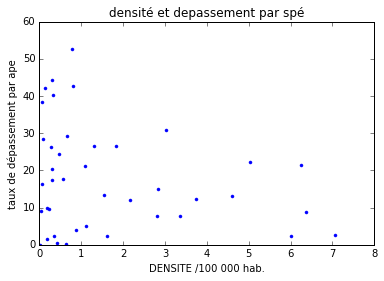

In [717]:
#plot de la densité et depassement=> pas de conclusion
plt.plot(result['DENSITE /100 000 hab.'],result['taux de dépassement par ape'],'.')
plt.xlabel('DENSITE /100 000 hab.')
plt.ylabel('taux de dépassement par ape')
plt.title('densité et depassement par spé')

In [724]:

df_depassement['Spécialistes'].str.contains('TOTAL')  #matrice de booleans sans les totales dans spécialist
df_total_spe_dens =df_depassement[df_depassement['Spécialistes'].str.contains('TOTAL')] #44 specialiste

grouped_total_spe_densite = df_total_spe_dens[['Spécialistes','DENSITE /100 000 hab.']].groupby('Spécialistes')
grouped_total_spe_densite_mean = grouped_total_spe_densite.mean().sort_values('DENSITE /100 000 hab.', ascending=False)
print(grouped_total_spe_densite_mean[:3]) 

result_tot = grouped_total_spe_densite_mean.join(group_mean_total_spe_depassement, how='outer')
result_tot[]

                                                    DENSITE /100 000 hab.
Spécialistes                                                             
TOTAL MEDECINS                                                 157.437383
TOTAL SPECIALISTES                                              69.754434
TOTAL CHIRURGIE y compris 10,16,41  (43, 44, 46...               8.808089


,DENSITE /100 000 hab.,taux de dépassement par ape
Spécialistes,,
"TOTAL ANESTHESIE REANIMATION (02, 20)",4.627922,13.131925
"TOTAL CHIRURGIE y compris 10,16,41 (43, 44, 46, 47, 48, 49, 04, 10, 16, 41)",8.808089,27.579939
"TOTAL GYNECOLOGIE (70, 77, 79, 07)",6.870637,20.492120
"TOTAL MEDECINE INTERNE (71, 73, 09)",0.578829,10.330296
TOTAL MEDECINS,157.437383,7.827148
"TOTAL PEDIATRIE (78, 12)",3.373053,7.717528
"TOTAL PSYCHIATRIE et NEUROPSYCHIATRIE (75, 33, 17)",6.623157,8.357680
"TOTAL RADIOLOGIE (72, 74, 76, 06)",8.012354,2.359934
TOTAL SPECIALISTES,69.754434,12.299390


(0, 20)

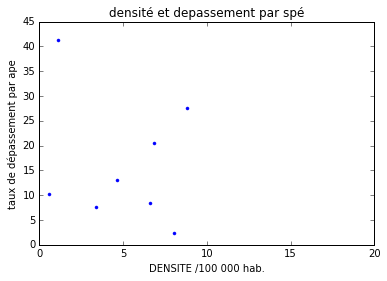

In [728]:
plt.plot(result_tot['DENSITE /100 000 hab.'],result_tot['taux de dépassement par ape'],'.')
plt.xlabel('DENSITE /100 000 hab.')
plt.ylabel('taux de dépassement par ape')
plt.title('densité et depassement par spé')
#ne pas tenir compte des points eloigné qui sont les totaux globaux
plt.xlim([0,20])

#point atypique=> chirurgie
#point forte densite + faible depassement=> radiologie + psychiatrie
 

In [3]:
import csv
File = open(NomFichier,'r')
Reader = csv.reader(File)
Data = list(Reader)
#len(Data)=28

#list de spécialité
list_spe_raw = Data[5]
list_spe = list_spe_raw[0].split(";") 
print("numero de spécialité:",len(list_spe))
#print(list_spe[1:])

#.replace("\'","")
list_spe_clean=[]
for i in list_spe[1:]: 
    list_spe_clean.append(i.replace("\"",""))
#print(list_spe_clean[1:])
    
#list d'une region à partir de 7
list_region_raw = Data[7]
list_region_clean = list_region_raw [0].split(";")  
#len(list_region_clean)
#print(list_region_clean)

NameError: name 'NomFichier' is not defined

In [4]:
#get the reh=gion name
list_region_name=[] 
for i in range(7,28):
    l=Data[i]
    l_bis=l[0].split(";")  
    list_region_name.append(l_bis[0])
print((list_region_name))

NameError: name 'Data' is not defined

In [1]:
#data frame des densité de medecin par spe sans les region
df = pd.DataFrame(list_clean)
df.columns = list_spe_clean
data_not_empty=df[df.Spécialistes !=0.0] #data without empty field
#copy
test = data_not_empty.copy()
test['region']=list_region_name 
#data_not_empty['region']= (list_region_name)

NameError: name 'pd' is not defined